# FINANCIAL FRAUD PROJECT : TANVIR AND SAAD

***Dataset: https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset***

We are importing the relevant libraries and loading the data

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import shapiro
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


# 1. LOAD DATA (uncomment if needed)
df = pd.read_csv("Synthetic_Financial_datasets_log.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Checking the rows and columns

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Checking the tail of the dataset

In [9]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


Checking the columns of the data

<Axes: xlabel='type', ylabel='count'>

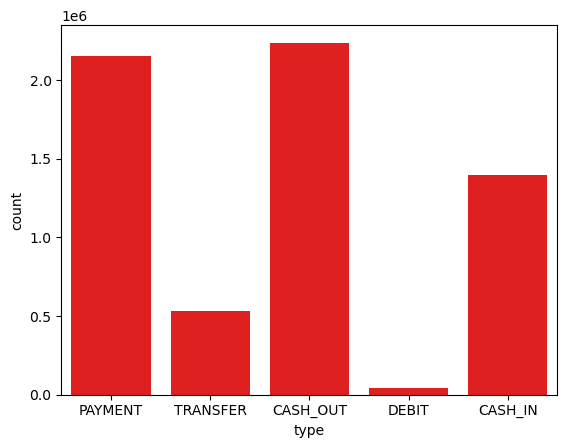

In [121]:
sns.countplot(data=df, x='type', color='red')

In [12]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Check the shape of the dataset

In [15]:
df.shape

(6362620, 11)

Checking the type of data we have in the dataset

In [18]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Check for null values in the dataset

In [21]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

***NO Need to clean the data***

In [24]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Since we do not have to clean the data, we can check the normality of the dataset

We are checking the normality of all the numerical columns

In [28]:
#Standardizing the data with z-score value

numeric_cols = df.select_dtypes(include=[np.number]).columns

print("Numeric columns to standardize:")
print(list(numeric_cols))

# Compute z-scores for all numeric columns (returns DataFrame)
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

# Keep only rows where all |z| < 3 (across all numeric columns)
df_clean = df[(z_scores < 3).all(axis=1)].copy()

print("\nOriginal shape:", df.shape)
print("Cleaned shape:", df_clean.shape)
print(f"Rows kept: {df_clean.shape[0]/df.shape[0]*100:.2f}%")

Numeric columns to standardize:
['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Original shape: (6362620, 11)
Cleaned shape: (6020098, 11)
Rows kept: 94.62%


In [29]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

print("Checking normality for numeric columns:\n")

# Loop through each numeric column
for col in numeric_cols:
    # Take a sample if dataset is huge (Shapiro is slow on large data)
    data = df[col].dropna()
    if len(data) > 5000:
        data = data.sample(5000, random_state=42)
    
    # Perform Shapiro-Wilk normality test
    stat, p_value = shapiro(data)
    
    # Interpret result
    if p_value > 0.05:
        print(f"{col}: Likely Normal (p-value = {p_value:.4f})")
    else:
        print(f"{col}: Not Normal (p-value = {p_value:.4f})")

Checking normality for numeric columns:

step: Not Normal (p-value = 0.0000)
amount: Not Normal (p-value = 0.0000)
oldbalanceOrg: Not Normal (p-value = 0.0000)
newbalanceOrig: Not Normal (p-value = 0.0000)
oldbalanceDest: Not Normal (p-value = 0.0000)
newbalanceDest: Not Normal (p-value = 0.0000)
isFraud: Not Normal (p-value = 0.0000)
isFlaggedFraud: Not Normal (p-value = 0.0000)


We are standardizing the dataset by the z-score value so that we have better data

The new dataset with z-score standardization

In [34]:
df_clean.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.020098e+06,6.020098e+06,6.020098e+06,6.020098e+06,6.020098e+06,6.020098e+06,6020098.0,6020098.0
mean,2.380655e+02,1.446973e+05,4.546180e+05,4.744816e+05,8.189448e+05,9.082559e+05,0.0,0.0
std,1.353710e+02,2.132763e+05,1.427488e+06,1.468689e+06,1.630845e+06,1.696457e+06,0.0,0.0
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,1.550000e+02,1.267605e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
50%,2.360000e+02,6.920885e+04,1.197100e+04,0.000000e+00,9.797286e+04,1.860782e+05,0.0,0.0
75%,3.320000e+02,2.024753e+05,9.856798e+04,1.165611e+05,8.432930e+05,1.004084e+06,0.0,0.0
max,6.700000e+02,1.991430e+06,9.498553e+06,9.627013e+06,1.129806e+07,1.224725e+07,0.0,0.0


***We are computing the distribution of isFraud and isFlaggedFraud to the type of transactions***


Fraud Summary by Transaction Type:
           isFraud  isFlaggedFraud    count
type                                       
TRANSFER  0.007688         0.00003   532909
CASH_OUT  0.001840         0.00000  2237500
CASH_IN   0.000000         0.00000  1399284
DEBIT     0.000000         0.00000    41432
PAYMENT   0.000000         0.00000  2151495


<Figure size 800x500 with 0 Axes>

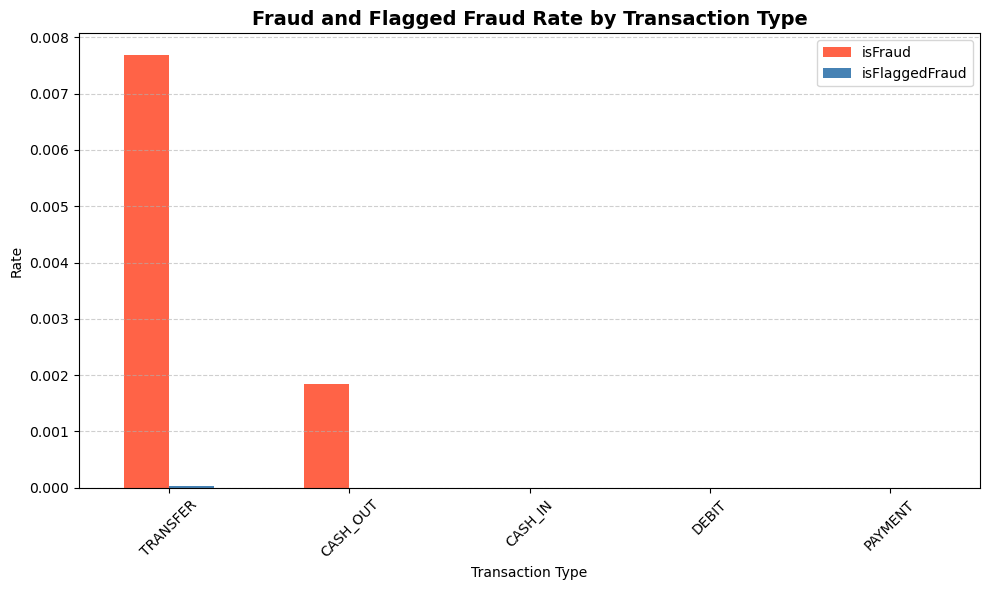

In [37]:
df['type'] = df['type'].astype(str).str.strip().str.upper()

# Compute fraud and flagged fraud rates by transaction type
fraud_summary = (
    df.groupby('type')[['isFraud', 'isFlaggedFraud']]
    .mean()
    .sort_values('isFraud', ascending=False)
)

# Add total counts to understand scale
fraud_summary['count'] = df['type'].value_counts()

print("\nFraud Summary by Transaction Type:")
print(fraud_summary)

# --- Visualization 1: Fraud and Flagged Fraud Rates ---
plt.figure(figsize=(8,5))
fraud_summary[['isFraud', 'isFlaggedFraud']].plot(
    kind='bar',
    figsize=(10,6),
    color=['tomato', 'steelblue']
)
plt.title('Fraud and Flagged Fraud Rate by Transaction Type', fontsize=14, fontweight='bold')
plt.ylabel('Rate')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

***Hypothesis Testing using chi-squared method***

***H0= isFraud == type***

***H1= isFraud != type***

In [42]:
from scipy.stats import chi2_contingency

# Contingency table between type and fraud
contingency = pd.crosstab(df['type'], df['isFraud'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"\nChi-square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p:.5f}")

if p < 0.05:
    print("✅ Fraud occurrence is significantly dependent on transaction type.")
else:
    print("❌ No significant dependency detected.")


Chi-square Statistic: 22082.54
Degrees of Freedom: 4
p-value: 0.00000
✅ Fraud occurrence is significantly dependent on transaction type.


***Fraud is highly dependent on transaction type***

***We accept H0 and reject H1***

***Now we run Random forest***

***We are running the model to see which type of transaction is is more prevalent to be fraud***

***Y values are the 5 variables under the column 'type'***

***X values are 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'***

We are only copying the data from isFraud that is True and relating it to the transaction types that have that isFraud value to be True

We are training the model with 80% of the data and testing with 20% of the data

In [52]:
# Keep only fraudulent transactions
df_fraud = df[df['isFraud'] == 1].copy()

le = LabelEncoder()
df_fraud['type_encoded'] = le.fit_transform(df_fraud['type'])

feature_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df_fraud[feature_cols]
y = df_fraud['type_encoded']

In [54]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,181.00,181.00,0.0,0.00,0.00
3,181.00,181.00,0.0,21182.00,0.00
251,2806.00,2806.00,0.0,0.00,0.00
252,2806.00,2806.00,0.0,26202.00,0.00
680,20128.00,20128.00,0.0,0.00,0.00
...,...,...,...,...,...
6362615,339682.13,339682.13,0.0,0.00,339682.13
6362616,6311409.28,6311409.28,0.0,0.00,0.00
6362617,6311409.28,6311409.28,0.0,68488.84,6379898.11
6362618,850002.52,850002.52,0.0,0.00,0.00


In [56]:
y

2          1
3          0
251        1
252        0
680        1
          ..
6362615    0
6362616    1
6362617    0
6362618    1
6362619    0
Name: type_encoded, Length: 8213, dtype: int32

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 1. TRAIN THE RANDOM FOREST MODEL ===
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

print("Training Random Forest on fraud-only data...")
rf.fit(X_train, y_train)
print("Training complete!")

# === 2. MAKE PREDICTIONS ===
y_pred_lr = rf.predict(X_test)

Training Random Forest on fraud-only data...
Training complete!


In [68]:
# 3. Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print("\n[Random Forest] Accuracy:", round(accuracy_score(y_test, y_pred_lr)*100, 2), "%")

print("\n[Random Forest] Classification Report:")
print(classification_report(
    y_test,
    y_pred_lr,
    target_names=le.classes_,   # same label names as Random Forest
    zero_division=0
))


[Random Forest] Accuracy: 99.15 %

[Random Forest] Classification Report:
              precision    recall  f1-score   support

    CASH_OUT       0.99      0.99      0.99       823
    TRANSFER       0.99      0.99      0.99       820

    accuracy                           0.99      1643
   macro avg       0.99      0.99      0.99      1643
weighted avg       0.99      0.99      0.99      1643



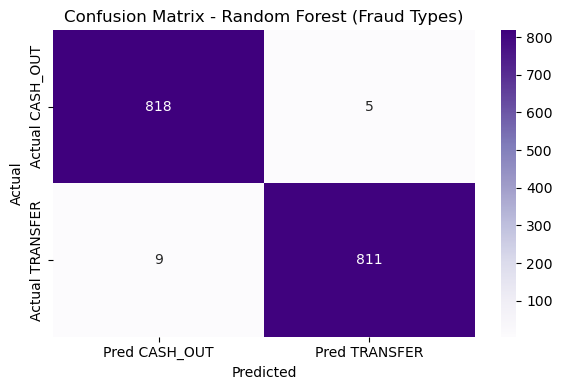

In [70]:
# 4. Confusion matrix for Random Forest
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr_df = pd.DataFrame(
    cm_lr,
    index=[f"Actual {c}" for c in le.classes_],
    columns=[f"Pred {c}" for c in le.classes_]
)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr_df, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Random Forest (Fraud Types)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

Here we have all the count we have for the type values

In [74]:
df_fraud['type'].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

We are computing the confusion matrix

In [77]:
y_pred = rf.predict(X_test)

# 2. Sanity check: lengths must match
print("len(y_test):", len(y_test))
print("len(y_pred):", len(y_pred))

len(y_test): 1643
len(y_pred): 1643


Here we are computing the accuracy of the model

Since there are only 2 y values, we are also running logistical regression

In [81]:
from sklearn.linear_model import LogisticRegression

# 1. Define Logistic Regression model
log_reg = LogisticRegression(
    max_iter=1000,        # increase iterations so it converges
    class_weight='balanced',  # handle any imbalance between the two classes
    solver='lbfgs'        # default solver (works fine for small number of features)
)

print("\nTraining Logistic Regression on FRAUD transactions only...")
log_reg.fit(X_train, y_train)
print("Training complete!")

# 2. Predict on the test set
y_pred_lr = log_reg.predict(X_test)


Training Logistic Regression on FRAUD transactions only...
Training complete!


In [83]:
# 3. Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print("\n[Logistic Regression] Accuracy:", round(accuracy_score(y_test, y_pred_lr)*100, 2), "%")

print("\n[Logistic Regression] Classification Report:")
print(classification_report(
    y_test,
    y_pred_lr,
    target_names=le.classes_,   # same label names as Random Forest
    zero_division=0
))


[Logistic Regression] Accuracy: 98.17 %

[Logistic Regression] Classification Report:
              precision    recall  f1-score   support

    CASH_OUT       1.00      0.97      0.98       823
    TRANSFER       0.97      1.00      0.98       820

    accuracy                           0.98      1643
   macro avg       0.98      0.98      0.98      1643
weighted avg       0.98      0.98      0.98      1643



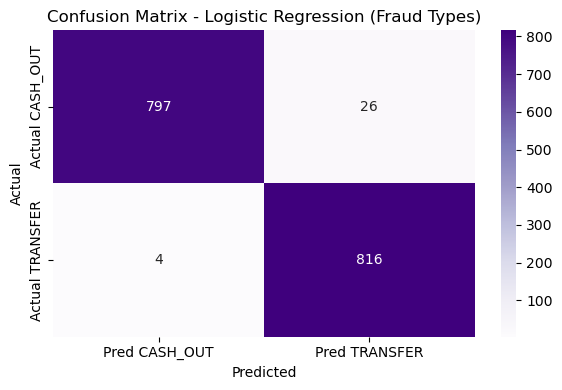

In [85]:
# 4. Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr_df = pd.DataFrame(
    cm_lr,
    index=[f"Actual {c}" for c in le.classes_],
    columns=[f"Pred {c}" for c in le.classes_]
)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr_df, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression (Fraud Types)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()


We are computing the difference in the two models: Logistical Regression and Random Forest to check which model is giving better prediction

In [88]:
# --- 3. PERFORMANCE COMPARISON ---

# Compute metrics for both models
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_lr)
    ],
    'Precision': [
        precision_score(y_test, y_pred_rf, average='weighted', zero_division=0),
        precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf, average='weighted', zero_division=0),
        recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_rf, average='weighted', zero_division=0),
        f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)
    ]
})

print("\n=== Model Comparison ===")
print(comparison_df.round(4))


=== Model Comparison ===
                 Model  Accuracy  Precision  Recall  F1 Score
0        Random Forest    0.9915     0.9915  0.9915    0.9915
1  Logistic Regression    0.9817     0.9821  0.9817    0.9817


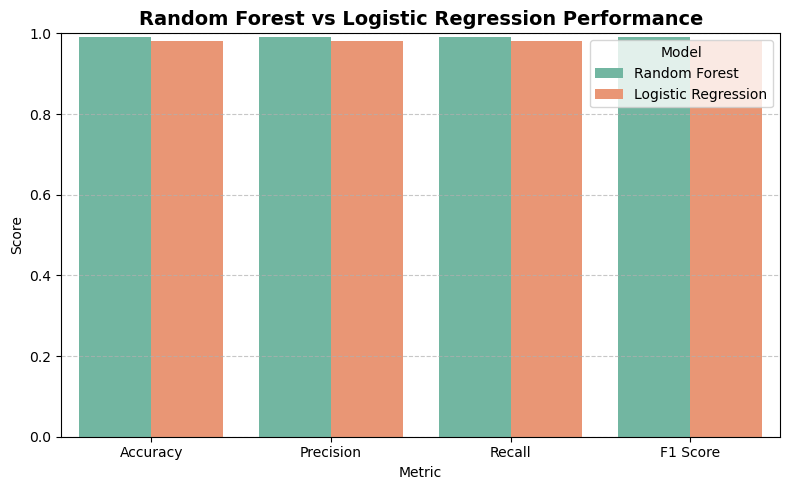

In [90]:
# --- 4. VISUAL COMPARISON ---

# Bar plot of performance metrics
melted_df = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(8,5))
sns.barplot(x='Metric', y='Score', hue='Model', data=melted_df, palette='Set2')
plt.title("Random Forest vs Logistic Regression Performance", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

***Fraud vs Non-Fraud Count***

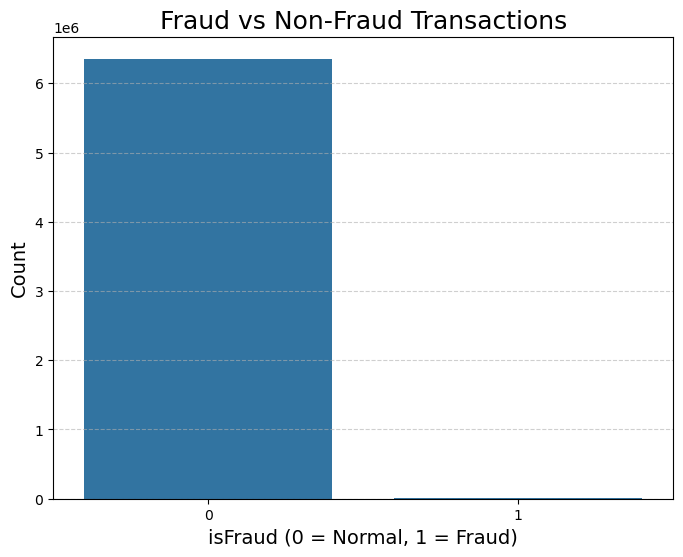

In [94]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['isFraud'])
plt.title('Fraud vs Non-Fraud Transactions', fontsize=18)
plt.xlabel('isFraud (0 = Normal, 1 = Fraud)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


***Distribution of Transaction Type***

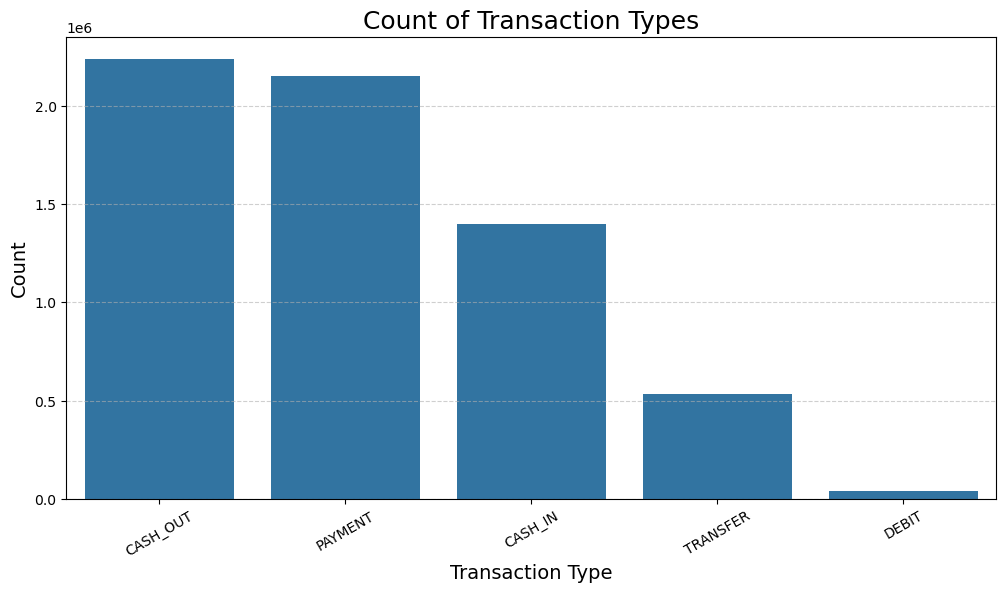

In [97]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['type'], order=df['type'].value_counts().index)
plt.title('Count of Transaction Types', fontsize=18)
plt.xlabel('Transaction Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=30)
plt.show()


***Heatmap — Correlation with Fraud***

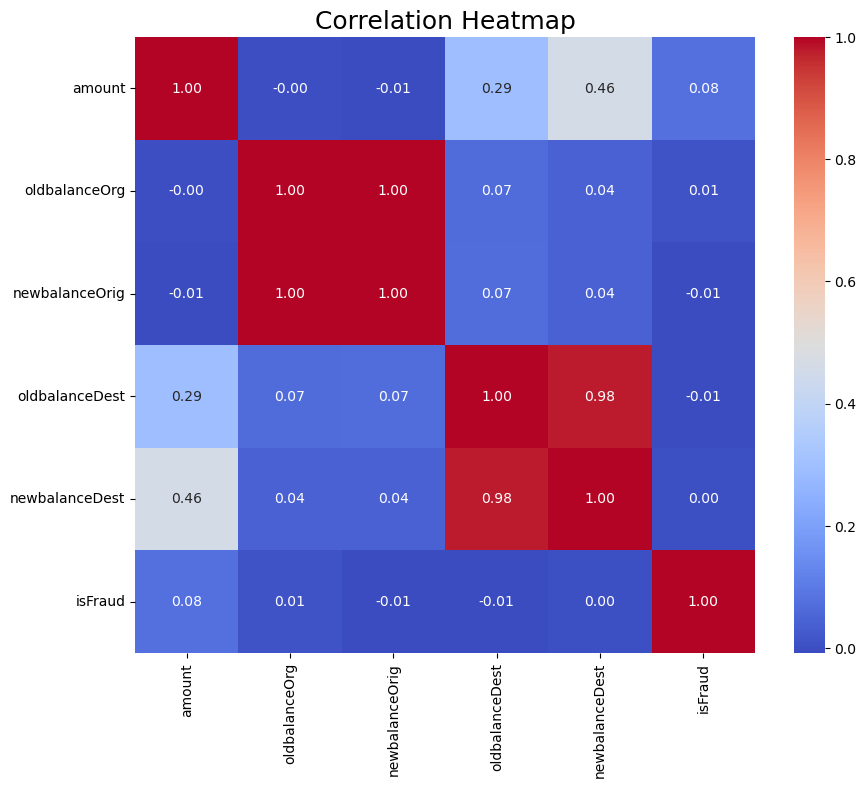

In [101]:
plt.figure(figsize=(10, 8))
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 
           'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=18)
plt.show()


***Fraud by Transaction Type***

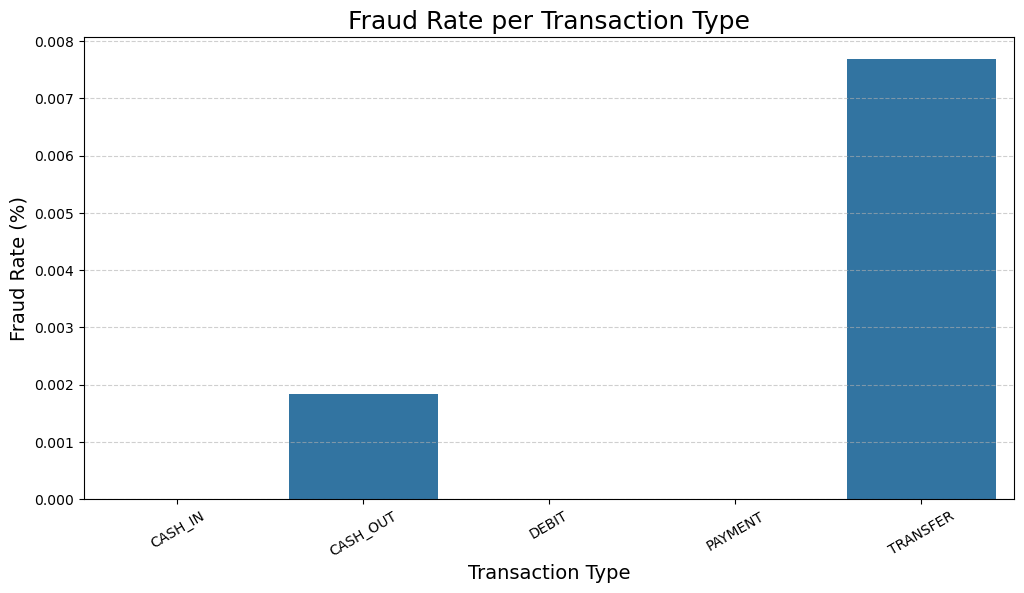

In [104]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=df.groupby('type')['isFraud'].mean().index,
    y=df.groupby('type')['isFraud'].mean().values
)
plt.title('Fraud Rate per Transaction Type', fontsize=18)
plt.xlabel('Transaction Type', fontsize=14)
plt.ylabel('Fraud Rate (%)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=30)
plt.show()


***Advanced Pie Chart — Transaction Type Distribution***

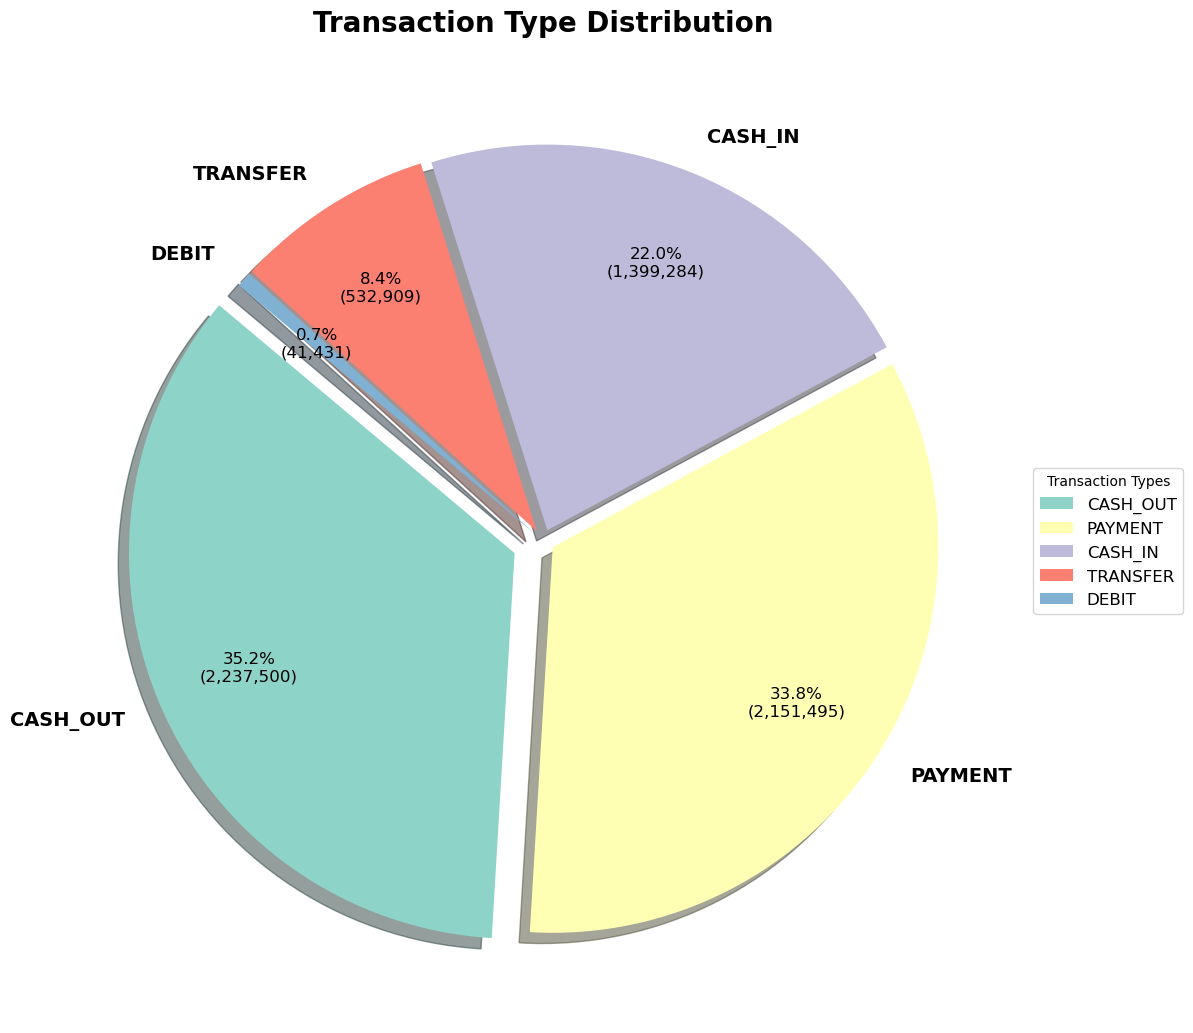

In [110]:
import matplotlib.pyplot as plt

# Count of each transaction type
type_counts = df['type'].value_counts()

# Extract values and labels
labels = type_counts.index
sizes = type_counts.values

# Sort types by size
sorted_idx = sizes.argsort()[::-1]
sizes = sizes[sorted_idx]
labels = labels[sorted_idx]

# Custom explode (slightly push out biggest category)
explode = [0.08 if i == 0 else 0.03 for i in range(len(labels))]

# Custom colors
colors = plt.cm.Set3(range(len(labels)))

plt.figure(figsize=(12, 12))

wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100.*sizes.sum()):,})",
    startangle=140,
    shadow=True,
    explode=explode,
    pctdistance=0.75,
    textprops={'fontsize': 12},
    colors=colors
)

# Make labels bold and outside
for text in texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

# Title with style
plt.title('Transaction Type Distribution', fontsize=20, fontweight='bold', pad=20)

# Draw legend + better placement
plt.legend(
    wedges,
    labels,
    title="Transaction Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12
)

plt.tight_layout()
plt.show()


***Scatter Plot — Amount vs New Balance Destination***

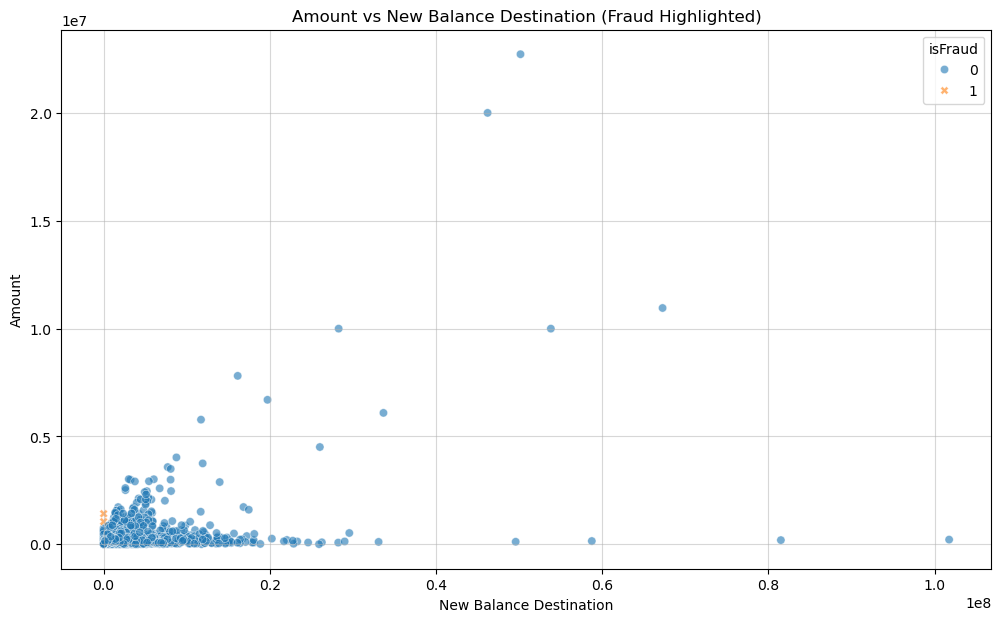

In [113]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df.sample(5000),
    x='newbalanceDest',
    y='amount',
    hue='isFraud',
    style='isFraud',
    alpha=0.6
)
plt.title('Amount vs New Balance Destination (Fraud Highlighted)')
plt.xlabel('New Balance Destination')
plt.ylabel('Amount')
plt.grid(alpha=0.5)
plt.show()
